In [38]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from google.colab.patches import cv2_imshow
import os
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.9.2'

In [3]:
#Recuperando os dados do drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/homer_bart_2.zip'
zip = zipfile.ZipFile(file=path, mode='r')
zip.extractall('./')
zip.close()

Mounted at /content/drive


Divindo a base entre treinamento e teste (o próprio TensorFlow irá reconhecer as classes usando o nome das pastas)

In [9]:
#definindo os préprocessamentos que serão feitos nas imagens
generate_train = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=7,
                                    horizontal_flip=True,
                                    zoom_range=0.2)

In [10]:
#recuperando todas as imagens de treino
data_train = generate_train.flow_from_directory('/content/homer_bart_2/training_set', target_size=(64,64),
                                                batch_size=8, 
                                                class_mode='categorical',
                                                shuffle=True)

Found 215 images belonging to 2 classes.


In [11]:
data_train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
data_train.class_indices

{'bart': 0, 'homer': 1}

In [13]:
generate_test = ImageDataGenerator(rescale=1./255)
data_test = generate_test.flow_from_directory('/content/homer_bart_2/test_set', target_size=(64,64),
                                              batch_size=1, 
                                              class_mode='categorical',
                                              shuffle=False)

Found 54 images belonging to 2 classes.


In [22]:
#Definindo a estrutura da rede neural

network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3) ,activation='relu')  )
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))

network.add(Dense(units=2, activation='softmax'))
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 32)        

In [25]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
#Treinando o modelo
historico = network.fit(data_train, epochs=50)

Epoch 1/50
27/27 [==============================] - 9s 22ms/step - loss: 0.6338 - accuracy: 0.6326
Epoch 2/50
27/27 [==============================] - 0s 18ms/step - loss: 0.5266 - accuracy: 0.7349
Epoch 3/50
27/27 [==============================] - 0s 17ms/step - loss: 0.4179 - accuracy: 0.8140
Epoch 4/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3763 - accuracy: 0.8233
Epoch 5/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3695 - accuracy: 0.8279
Epoch 6/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3065 - accuracy: 0.8651
Epoch 7/50
27/27 [==============================] - 0s 18ms/step - loss: 0.2763 - accuracy: 0.8698
Epoch 8/50
27/27 [==============================] - 0s 18ms/step - loss: 0.2733 - accuracy: 0.9023
Epoch 9/50
27/27 [==============================] - 0s 17ms/step - loss: 0.3192 - accuracy: 0.8744
Epoch 10/50
27/27 [==============================] - 0s 17ms/step - loss: 0.2560 - accuracy: 0.8698
Epoch 11/

In [30]:
#Avaliando o modelo
predict = network.predict(data_test)
predict

54/54 [==============================] - 0s 3ms/step


array([[1.00000000e+00, 3.66466659e-21],
       [1.00000000e+00, 9.21209897e-12],
       [1.35811744e-04, 9.99864221e-01],
       [1.00000000e+00, 3.00274602e-19],
       [1.00000000e+00, 1.01624636e-25],
       [1.00000000e+00, 4.99061934e-21],
       [9.99999881e-01, 1.09428726e-07],
       [9.70548749e-01, 2.94512343e-02],
       [8.10467303e-02, 9.18953300e-01],
       [9.99849916e-01, 1.50066742e-04],
       [1.00000000e+00, 1.63526028e-08],
       [1.00000000e+00, 1.88654205e-17],
       [9.86415327e-01, 1.35846864e-02],
       [1.00000000e+00, 5.64194096e-08],
       [1.00000000e+00, 6.36864852e-22],
       [1.00000000e+00, 1.38323847e-17],
       [6.42060954e-03, 9.93579388e-01],
       [9.99999881e-01, 9.21160677e-08],
       [9.99946237e-01, 5.37112755e-05],
       [1.00000000e+00, 3.27772243e-23],
       [9.99997854e-01, 2.19461049e-06],
       [1.00000000e+00, 2.45057349e-19],
       [9.99998927e-01, 1.01529122e-06],
       [9.79624748e-01, 2.03753002e-02],
       [9.999997

In [31]:
#recuperando o maior valor (maior probabilidade)
predict = np.argmax(predict, axis=1)
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [34]:
accuracy_score(data_test.classes, predict)

0.8888888888888888

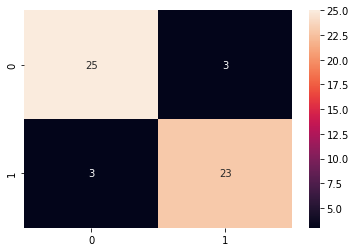

In [37]:
cm = confusion_matrix(data_test.classes, predict)
sns.heatmap(cm, annot=True)

In [39]:
print(classification_report(data_test.classes, predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.88      0.88      0.88        26

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



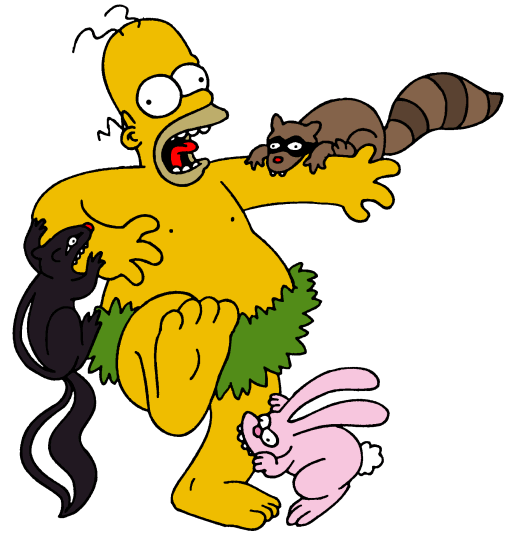

In [55]:
#Classificando uma única imagem
img = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(img)

In [56]:
#Pré-processamento da imagem para o mesmo padrão que a rede foi treinada
img = cv2.resize(img, (64,64))
img = img/255
img = img.reshape(-1,64,64,3)

(536, 514, 3)

In [60]:
predict = network_loaded.predict(img)

1/1 [==============================] - 0s 75ms/step


In [61]:
predict = np.argmax(predict)
predict

1

In [62]:
data_test.class_indices

{'bart': 0, 'homer': 1}

In [63]:
if predict ==0:
  print('Bart')
else:
  print('Homer')

Homer
